# Machine Learning - Assignment 1

In [1]:
# Importing all the libraries required for the assignment

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cross_validation import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.externals.six import StringIO 
import pydot 
import os
from IPython.display import Image
from pandas.tools.plotting import scatter_matrix
import re
import seaborn as sns
sns.set()

/Users/Deepthi/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
# Set directory

%cd /Users/Deepthi/Documents/DSE/Q3_DSE220 - Machine Learning/Day 1/Assignment 1/Data

/Users/Deepthi/Documents/DSE/Q3_DSE220 - Machine Learning/Day 1/Assignment 1/Data


### Problem 1 - Weather Data

##### Download the Weather data set, a simple data set describing whether or not to play tennis based on the weather conditions. Represent the following table using a data structure of your choice


In [3]:
# Download weather data and represent as a Pandas dataframe.

weather_data = pd.read_csv('weather_data.csv')
weather_data

day   outlook  temperature  humidity  windy play
0     1     sunny           85        85  False   no
1     2     sunny           80        90   True   no
2     3  overcast           83        86  False  yes
3     4     rainy           70        96  False  yes
4     5     rainy           68        80  False  yes
5     6     rainy           65        70   True   no
6     7  overcast           64        65   True  yes
7     8     sunny           72        95  False   no
8     9     sunny           69        70  False  yes
9    10     rainy           75        80  False  yes
10   11     sunny           75        70   True  yes
11   12  overcast           72        90   True  yes
12   13  overcast           81        75  False  yes
13   14     rainy           71        91   True   no

##### Given that data structure:

##### a. Calculate the mean temperature and mean humidity

In [4]:
print 'Following are the mean temperature and humidity:'
weather_data[['temperature','humidity']].mean()

Following are the mean temperature and humidity:


temperature    73.571429
humidity       81.642857
dtype: float64

##### b. Print outlook and play for those days where the temperature is greater than the average temperature

In [5]:
weather_data[weather_data['temperature']>weather_data['temperature'].mean()][['outlook','play']]

outlook play
0      sunny   no
1      sunny   no
2   overcast  yes
9      rainy  yes
10     sunny  yes
12  overcast  yes

##### c. Print outlook and play for those days where the humidity is greater than the average humidity

In [6]:
weather_data[weather_data['humidity']>weather_data['humidity'].mean()][['outlook','play']]

outlook play
0      sunny   no
1      sunny   no
2   overcast  yes
3      rainy  yes
7      sunny   no
11  overcast  yes
13     rainy   no

##### d. Convert the temperature to Celsius and add a new column therefore in the table. Use the following conversion equation C=(F−32)∗5/9

In [7]:
weather_data['temperature_celcius'] = weather_data['temperature'].apply(lambda x: round(((x-32)*5.0/9),2))
weather_data

day   outlook  temperature  humidity  windy play  temperature_celcius
0     1     sunny           85        85  False   no                29.44
1     2     sunny           80        90   True   no                26.67
2     3  overcast           83        86  False  yes                28.33
3     4     rainy           70        96  False  yes                21.11
4     5     rainy           68        80  False  yes                20.00
5     6     rainy           65        70   True   no                18.33
6     7  overcast           64        65   True  yes                17.78
7     8     sunny           72        95  False   no                22.22
8     9     sunny           69        70  False  yes                20.56
9    10     rainy           75        80  False  yes                23.89
10   11     sunny           75        70   True  yes                23.89
11   12  overcast           72        90   True  yes                22.22
12   13  overcast           81        75  False  yes                27.22
13   14     rainy           71        91   True   no                21.67

##### 1. How often do you play tennis independent of the other attributes?


In [8]:
print 'Tennis is played %d out of %d times independent of other attributes' %((weather_data[weather_data['play']=='yes']['day'].count()),weather_data['day'].count()),
print 'which is' , round(float(weather_data[weather_data['play']=='yes']['day'].count())*100/weather_data['day'].count(),2),'% of the times.'

Tennis is played 9 out of 14 times independent of other attributes which is 64.29 % of the times.


##### 2. How often do you play tennis when it is "sunny"?

In [9]:
print 'Tennis is played %d out of %d times when it is sunny' %((weather_data[(weather_data['play']=='yes') & (weather_data['outlook']=='sunny')]['day'].count()),weather_data[weather_data['outlook']=='sunny']['day'].count()),
print 'which is',round(float(weather_data[(weather_data['play']=='yes') & (weather_data['outlook']=='sunny')]['day'].count())*100/weather_data[weather_data['outlook']=='sunny']['day'].count(),2),'% of times.'

Tennis is played 2 out of 5 times when it is sunny which is 40.0 % of times.


##### 3. Compare the average, minimum and maximum temperature when you play tennis?

In [10]:
print 'Following are the average, minimum and maximum temperatures when tennis is played:'
print 'Average temperature =', round(weather_data['temperature'].mean(),2),'F'
print 'Minimum temperature =', weather_data['temperature'].min(),'F'
print 'Maximum temperature =', weather_data['temperature'].max(),'F'

Following are the average, minimum and maximum temperatures when tennis is played:
Average temperature = 73.57 F
Minimum temperature = 64 F
Maximum temperature = 85 F


##### 4. Compare the average, minimum and maximum humidity when you play tennis?


In [11]:
print 'Following are the average, minimum and maximum humidity when tennis is played:'
print 'Average Humidity =', round(weather_data['humidity'].mean(),2)
print 'Minimum Humidity =', weather_data['humidity'].min()
print 'Maximum Humidity =', weather_data['humidity'].max()

Following are the average, minimum and maximum humidity when tennis is played:
Average Humidity = 81.64
Minimum Humidity = 65
Maximum Humidity = 96


##### 5. Plot a scatter plot (x,y diagram) of humidity (x) and temperature (y) when you play tennis compared to when you do not play tennis. 

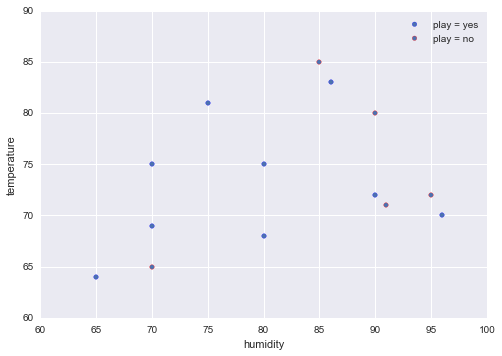

In [12]:
subset_a = weather_data[weather_data['play']=='yes']
subset_b = weather_data[weather_data['play']=='no']
ax = subset_a.plot(kind='scatter', x='humidity', y='temperature',color='b', label='play = yes');
subset_b.plot(kind='scatter', x='humidity', y='temperature',color='r', label='play = no', ax=ax);

### Problem 2 - Historical population of US states

##### Included with the assignment are several files (stxxxxts).  These files track the historical population of US states by year for 1900-1990.  Write a script to process these data and load them into a data structure you can work with. What problems did you have to deal with when working with these files?

##### The following script shows how the data was imported along with a brief description of problems dealt with at each stage:

In [13]:
# Save the relevant data into another text file and rename the files such that it is easier to process
!tail -n+16 st0009ts.txt > file1.txt
!tail -n+16 st1019ts.txt > file2.txt
!tail -n+16 st2029ts.txt > file3.txt
!tail -n+16 st3039ts.txt > file4.txt
!tail -n+14 st4049ts.txt > file5.txt ## Different number of intro lines
!tail -n+16 st5060ts.txt > file6.txt
!tail -n+16 st6070ts.txt > file7.txt
!tail -n+14 st7080ts.txt > file8.txt ## Different number of intro lines
!tail -n+10 st8090ts.txt > file9.txt

##### In the above step, the files st4049ts.txt and st7080ts.txt had different number of introduction lines when compared to others. So the code had to be tweaked to remove different number of lines in the beginning of each file

In [14]:
# Drop blank lines
file1=pd.read_fwf('file1.txt').dropna()
file2=pd.read_fwf('file2.txt').dropna()
file3=pd.read_fwf('file3.txt').dropna()
file4=pd.read_fwf('file4.txt').dropna()
file5=pd.read_fwf('file5.txt').dropna()
file6=pd.read_fwf('file6.txt').dropna()
file7=pd.read_fwf('file7.txt').dropna()
file8=pd.read_fwf('file8.txt').dropna()
file8 = file8.ix[:,1:] ## Remove additional column
file9=pd.read_fwf('file9.txt').dropna()

##### In the above step, file8.txt which is cleaned up version of st7080ts.txt had an additional column 'Fip' which the other tables did not have. That column looked like a row number without much information. So I dropped that column to mantain consistency.

In [15]:
# Rename columns to indicate the year and version of the population (census/predicted)
file1.columns = ['state','1900','1901','1902','1903', '1904', '1905','1906', '1907', '1908', '1909']
file2.columns = ['state','1910','1911','1912','1913', '1914', '1915','1916', '1917', '1918', '1919']
file3.columns = ['state','1920','1921','1922','1923', '1924', '1925','1926', '1927', '1928', '1929']
file4.columns = ['state','1930','1931','1932','1933', '1934', '1935','1936', '1937', '1938', '1939']
file5.columns = ['state','1940','1941','1942','1943', '1944', '1945','1946', '1947', '1948', '1949']
file6.columns = ['state','1950-census','1950','1951','1952','1953', '1954', '1955','1956', '1957', '1958', '1959','1960-census']
file7.columns = ['state','1960-apr','1960-jul','1961','1962','1963', '1964', '1965','1966', '1967', '1968', '1969','1970-apr']
file8.columns = ['state','1970-apr','1971','1972','1973', '1974', '1975','1976', '1977', '1978', '1979','1980-apr']
file9.columns = ['state','1980-apr','1981','1982','1983', '1984', '1985','1986', '1987', '1988', '1989','1990-apr']

##### In the above step, the column names, which were in diffrent formats, were renamed by considering different versions of the same column. i.e, Some files contained census data as well as the predicted data. Each version of the same column had to be renamed and to indicate the same.

In [16]:
# Convert all the columns into float
file_list = [file1,file2,file3,file4,file5,file6,file7]
for i in range(len(file_list)):
    for j in range(1,len(file_list[i].columns)):
        file_list[i][file_list[i].columns[j]] = file_list[i][file_list[i].columns[j]].apply(lambda x: re.sub(r',', "", x))
        file_list[i][file_list[i].columns[j]] = file_list[i][file_list[i].columns[j]].astype(float)

In [17]:
# Change the scale of population in file 8 and 9
file8.iloc[:,1:] = file8.iloc[:,1:].astype(float)
file8.iloc[:,1:]=file8.iloc[:,1:].apply(lambda x:x/1000)

file9.iloc[:,1:] = file9.iloc[:,1:].astype(float)
file9.iloc[:,1:]=file9.iloc[:,1:].apply(lambda x:x/1000)

##### In the above step, many of the population columns were not in numeric format. So converted them all into numeric and also got the file8 and file9 in the same scale as other files

In [18]:
# Merge the files to plot the trends
us_population_combined = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(file1,file2,how='outer',on='state'),
                                                                file3,how='outer',on='state'),
                                                                file4,how='outer',on='state'),
                                                                file5,how='outer',on='state'),
                                                                file6,how='outer',on='state'),
                                                                file7,how='outer',on='state'),
                                                                file8,how='outer',on='state'),
                                                                file9,how='outer',on='state')
                                                            

In [19]:
## Keep census data when available
## When both Apr and July population is available, keep April version as july version is only as estimate
## Keep population from 1970_apr column from file 8 and drop the same column from file7 as file7 contains more null

us_population_combined = us_population_combined.drop(['1950','1960-apr','1960-jul','1970-apr_x','1980-apr_x'],axis=1)

##### To maintain consistency in data, the following rules were applied in the step above:
1. Keep census data when available dn discard estimates for the same year
2. When Apr and July population is available, keep only April Version as July version is only an estimate
3. Keep population from 1970_apr column from file8 and drop the same column from file7 as the column from file7 contains more nulls
4. Keep population from 1980_apr column from file9 and drop the same column from file8 as the column from file9 is the latest update

##### Plot the populations of Alaska and California over time. 

##### Since Alaska and California have data for different years, I have plotted them as subplots for the ease of reading the graphs. The graphs show growth in population in both the states over the years.

In [20]:
to_plot1=((us_population_combined[us_population_combined['state'].isin(['AK','CA'])].transpose()).reset_index()).ix[1:,:]

In [21]:
to_plot1.columns = ['year','CA','AK']

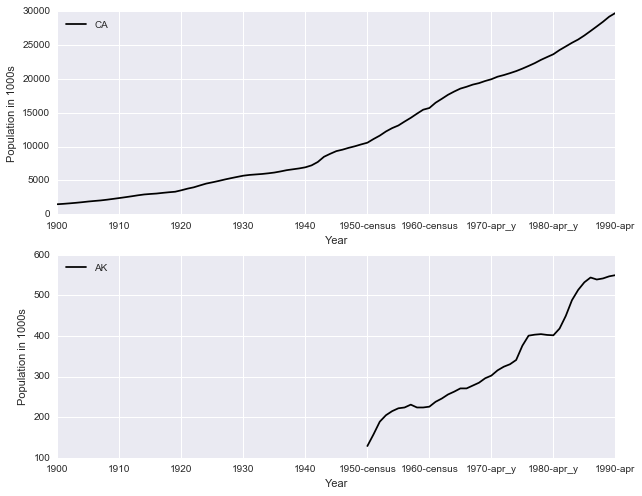

In [22]:
ax = to_plot1.plot(subplots=True, figsize=(10, 8),sharex=False, x='year')
ax[0].set_ylabel('Population in 1000s')
ax[1].set_ylabel('Population in 1000s')
ax[0].set_xlabel('Year')
ax[1].set_xlabel('Year')
plt.show()

##### Plot the population of New England and the Southwest over time.

##### New England is defined as ME, VT, NH, MA, RI, CT 
##### Southwest states = AZ, CA, CO, NV, NM, TX, UT

In [23]:
to_plot2 = (((us_population_combined[us_population_combined['state'].isin(['ME', 'VT', 'NH', 'MA', 'RI', 'CT','AZ','CA','CO','NV','NM','TX','UT'])]).transpose()).reset_index()).ix[1:,:]

In [24]:
to_plot2.columns = ['Year','AZ','CA','CO','CT','MA','ME','NH','NM','NV','RI','TX','UT','VT']
to_plot2['New England'] = to_plot2[['ME', 'VT', 'NH', 'MA', 'RI', 'CT']].sum(axis=1)
to_plot2['Southwest'] = to_plot2[['AZ','CA','CO','NV','NM','TX','UT']].sum(axis=1)

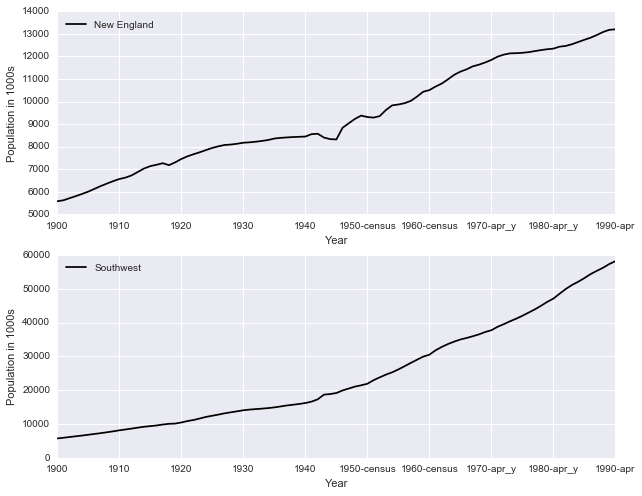

In [25]:
ax = to_plot2[['Year','New England','Southwest']].plot(subplots=True, figsize=(10, 8),sharex=False, x='Year')
ax[0].set_ylabel('Population in 1000s')
ax[1].set_ylabel('Population in 1000s')
ax[0].set_xlabel('Year')
ax[1].set_xlabel('Year')
plt.show()

##### What state showed the greatest change in population? Note that there is more than one way to quantify this - provide at least two (meaningful) ways in your iPython Notebook.


###### Folowing three methods were used to caclulate change in population:

Method 1: Average growth rate = Average(% change YoY for all the years)

Method 2: Total % growth between 1900(first year) and 1990(last year) 

Method 3: Exponential growth: It is known that population follows exponential trend. r = ln(Pt-P0)/t


In [26]:
# Method 1: Average growth rate: This is the simplest way to measure the growth rate per year
# In this method I have calculated YoY population change % and averaged it over time

remove = us_population_combined['state'].isin(['U.S.', 'Northeast', 'North Central', 'South', 'West','Midwest', 'US'])
average_change = us_population_combined[~remove]


average_change_2 = ((average_change.transpose()).reset_index()).ix[1:,:]

average_change_2.columns = ['Year','AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'IA',
                                                   'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN',
                                                   'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY',
                                                   'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA',
                                                   'VT', 'WA', 'WI', 'WV', 'WY', 'AK', 'HI']

average_change_3 = (average_change_2.set_index('Year').pct_change()).reset_index()

average_change_4 = pd.DataFrame(average_change_3.mean(axis=0)).sort(0,ascending=0).reset_index()
average_change_4.columns = ['state','average_change %']
average_change_4['average_change %']=average_change_4['average_change %'].apply(lambda x:x*100)
average_change_4.head(1)

state  average_change %
0    AZ          3.908487

In [27]:
# Method 2: Total growth between 1900 and 1990
# This is the easiest way to look at the total change in population from 1900 to 1990
remove = us_population_combined['state'].isin(['U.S.', 'Northeast', 'North Central', 'South', 'West','Midwest', 'US'])
total_change = us_population_combined[~remove][['state','1900','1990-apr']]

total_change['total_change %']=(total_change['1990-apr']-total_change['1900'])*100/(total_change['1900'])

total_change.sort(['total_change %'], ascending=0).head(1)

state  1900  1990-apr  total_change %
7    AZ   124  3665.228     2855.829032

In [28]:
# Method 3: Exponential growth
# It is well known and also observed in the plots above that population growth is exponential. 
# So, calculating exponential growth is apt in this scenario


remove = us_population_combined['state'].isin(['U.S.', 'Northeast', 'North Central', 'South', 'West','Midwest', 'US'])
exp_change = us_population_combined[~remove][['state','1900','1990-apr']]

exp_change['total_change']= np.log(exp_change['1990-apr']/exp_change['1900'])/(len(us_population_combined.columns)-1)

exp_change.sort(['total_change'], ascending=0).head(1)


state  1900  1990-apr  total_change
7    AZ   124  3665.228      0.037213

### Problem 4 - Decision Trees

##### Classification trees, either binary or multi-class, are implemented in scikit-learn in the DecisionTreeClassifier class.   Build, plot and evaluate a decision tree on the wine dataset.  Split the dat set into 75% for training and 25% for testing.  Evaluate based on confusion matrix how well the model performed on training vs. testing.  Document the steps taken. 

##### Following are the steps taken:
1. Read the wine data and prepared the data
2. Split the data into train and test (75% and 25%)
3. Used the DecisionTreeClassifier and train the wine data
4. Then applied the classifier on the test data to measure the accuracy of prediction
5. Iterated for the best split of test and train using random_state. An accuracy of **95.56%** was achieved
6. Decision tree was then plotted to understand how the variables were split

In [29]:
# Read the data and rename the columns

wine_data = pd.read_csv('wine.txt',header = None)
wine_data.columns=['class','att01','att02','att03','att04','att05','att06','att07','att08','att09','att10','att11','att12','att13']     

In [30]:
# Split the data into test and train

wine_train, wine_test = train_test_split(wine_data, test_size=0.25, random_state=9)

In [31]:
# Create a decision tree classifier

clf = tree.DecisionTreeClassifier()
clf = clf.fit(wine_train.ix[:,1:],wine_train.ix[:,:1])

In [32]:
# Use the test data and predict the class

predicted =clf.predict(wine_test.ix[:,1:])
actual = np.hstack(wine_test.ix[:,:1].values)

In [33]:
# Calculate accuracy

calc_accuracy = pd.DataFrame(zip(actual,predicted))
calc_accuracy.columns = ['actual','predicted']
calc_accuracy['error'] = (calc_accuracy['actual']<>calc_accuracy['predicted']).astype('int')
accuracy = 100 - float(calc_accuracy['error'].sum())*100/float(calc_accuracy['actual'].count())
print 'Accuracy = ',round(accuracy,2), '%'

Accuracy =  95.56 %


In [34]:
# Create confusion matrix
# Note that Class1 and Class2 wines were classified accurately 100% of the times. 
# Class3 had 2 instances which were erroneously classified as Class2

confusion_matrix(actual, predicted)

array([[20,  0,  0],
       [ 0, 13,  0],
       [ 0,  2, 10]])

In [35]:
# Represent the decision tree graphically 
with open("wine.dot", 'w') as f:
     f = tree.export_graphviz(clf, out_file=f)

os.unlink('wine.dot')

In [36]:
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph.write("wine.png",format="png")

True

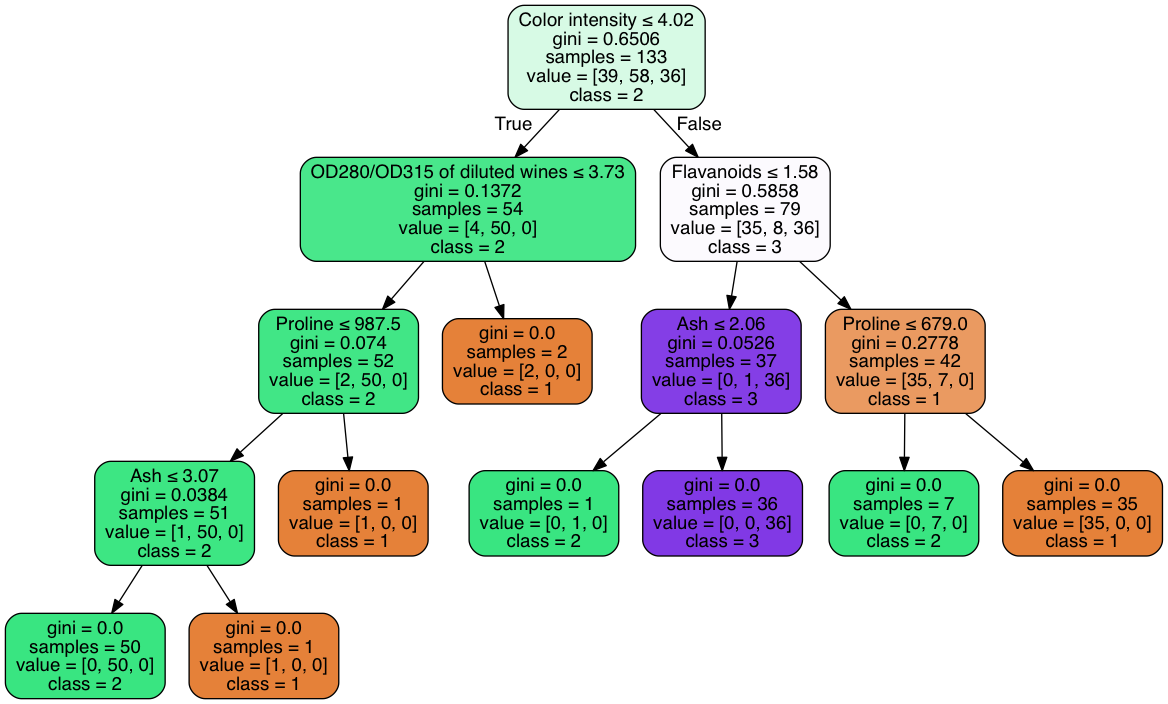

In [37]:
attributes = ['Alcohol','Malic acid','Ash','Alcalinity of ash',  'Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=attributes,  
                         class_names=['1','2','3'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

### Problem 5 - London 2012 Olympians

##### Download Dataset of London 2012 Olympians called AHW_1.CSV.    Perform Data preparation and cleaning of the data set.

In [38]:
# Read the data into a Pandas dataframe

olympians_data = pd.read_csv('AHW_1.csv')
olympians_data.head()

Total       Sport  Age  Height  Weight Sex
0       0       Judo   23     170      60   M
1       0  Athletics   33     193     125   M
2       0  Athletics   30     187      76   M
3       0     Boxing   24     NaN     NaN   M
4       0  Athletics   26     178      85   F

In [39]:
olympians_data.count()

Total     10384
Sport     10384
Age       10384
Height     9823
Weight     9104
Sex       10384
dtype: int64

#### Data cleaning and preparation

In [40]:
# Split the sport columns by ',' to clean the sport column with multiple sports
s = olympians_data['Sport']
olympians_data = olympians_data.join(s.apply(lambda x: pd.Series(x.split(','))))

In [41]:
# Create a new column with 1 sport name in each row. In this section those with 3 names in 'Sport' column are considered.

replicate1 = olympians_data[~((olympians_data[1].isnull()) | (olympians_data[2].isnull()))]

replicate1a = replicate1.copy(deep=True)
replicate1a['new_sport']=replicate1[0]

replicate1b = replicate1.copy(deep=True)
replicate1b['new_sport']=replicate1[1]

replicate1c = replicate1.copy(deep=True)
replicate1c['new_sport']=replicate1[2]

append1 = (replicate1a.append(replicate1b)).append(replicate1c)

In [42]:
# Create a new column with 1 sport name in each row. In this section those with 2 names in 'Sport' column are considered.

replicate2 = olympians_data[(~(olympians_data[1].isnull()) & (olympians_data[2].isnull()))]

replicate2a = replicate2.copy(deep=True)
replicate2a['new_sport']=replicate2[0]

replicate2b = replicate2.copy(deep=True)
replicate2b['new_sport']=replicate2[1]

append2 = replicate2a.append(replicate2b)

In [43]:
# Final data clean up by removing unwanted columns and renaming the columns to represent the original version of the data

olympians_data['new_sport'] = olympians_data['Sport']
olympians_data = olympians_data[olympians_data[1].isnull() & olympians_data[2].isnull()]
olympians_data=(olympians_data.append(append1)).append(append2)
olympians_data = olympians_data[['Total ','new_sport','Age','Height','Weight','Sex']]
olympians_data.columns = ['Total ', 'Sport', 'Age', 'Height', 'Weight', 'Sex']

# Remove the unwanted spaces in the 'Sport column'
olympians_data['Sport']=olympians_data['Sport'].apply(lambda x: x.lstrip(' ').rstrip(' '))

olympians_data.head()

Total       Sport  Age  Height  Weight Sex
0       0       Judo   23     170      60   M
1       0  Athletics   33     193     125   M
2       0  Athletics   30     187      76   M
3       0     Boxing   24     NaN     NaN   M
4       0  Athletics   26     178      85   F

##### What are the statistical distributions of variables using no class? 

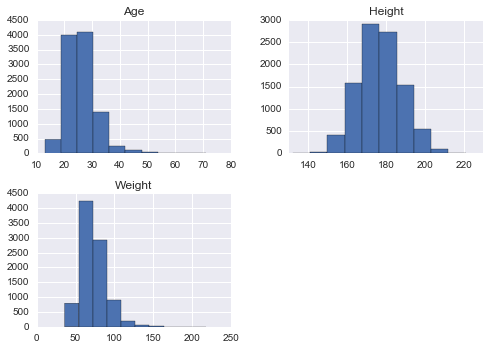

In [44]:
# Statistical distributions of continuous variables
# Height looks normally distributed with a mean of 170 pounds
# Age and Weight are not as spread out as Height

olympians_data[['Age','Height','Weight']].hist()
plt.show()

##### How much missing data is there?

In [45]:
print '% nulls in each column'
(olympians_data.isnull().sum())*100/(olympians_data.count())

% nulls in each column


Total      0.000000
Sport      0.000000
Age        0.000000
Height     5.694275
Weight    14.015110
Sex        0.000000
dtype: float64

##### How do distributions differ by each gender?

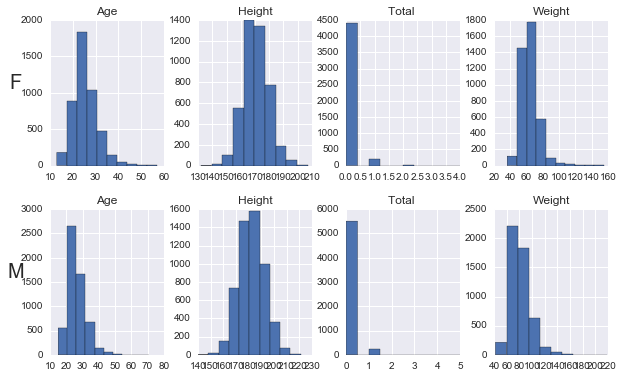

In [46]:
# Distributions for Males and Females look similar. Except mean Weight and Height for Males are slightly higher 
# than that for Females
# Note: Total column doesn't seem to carry any relevant information

labels = ['F','M']
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10,6))
olympians_data[olympians_data['Sex']=='F'].hist(ax=axes[0])
olympians_data[olympians_data['Sex']=='M'].hist(ax=axes[1])

for ax, row in zip(axes[:,0], labels):
    ax.set_ylabel(row, rotation=0, size=20)

plt.show()

##### Describe summary statistics for each attribute. Plot each one of the attributes distributions.  Are any of the variables different for male vs. female athletes? 

In [47]:
olympians_data.describe()

Total            Age       Height       Weight
count  10413.000000  10413.000000  9852.000000  9133.000000
mean       0.052338     26.075194   176.898599    72.829738
std        0.250331      5.443985    11.287846    16.056406
min        0.000000     13.000000   132.000000    36.000000
25%        0.000000     22.000000   169.000000    61.000000
50%        0.000000     25.000000   176.000000    70.000000
75%        0.000000     29.000000   185.000000    81.000000
max        5.000000     71.000000   221.000000   218.000000

##### When you compare the Female and Male athletes, on an average, Male athletes seem to be slightly older, taller and significantly heavier

In [48]:
# When you compare the Female and Male athletes, on an average, Male athletes seem to be slightly older, 
# taller and significantly heavier
olympians_data.groupby(['Sex']).describe()

Age       Height       Total        Weight
Sex                                                          
F   count  4640.000000  4439.000000  4640.000000  4061.000000
    mean     25.461638   170.236089     0.056681    63.203398
    std       5.324098     8.818031     0.263499    10.810641
    min      13.000000   132.000000     0.000000    36.000000
    25%      22.000000   165.000000     0.000000    56.000000
    50%      25.000000   170.000000     0.000000    62.000000
    75%      29.000000   176.000000     0.000000    69.000000
    max      57.000000   207.000000     4.000000   155.000000
M   count  5773.000000  5413.000000  5773.000000  5072.000000
    mean     26.568335   182.362276     0.048848    80.537263
    std       5.489426    10.094258     0.239189    15.397110
    min      15.000000   140.000000     0.000000    42.000000
    25%      23.000000   175.000000     0.000000    70.000000
    50%      26.000000   182.000000     0.000000    78.000000
    75%      29.000000   189.000000     0.000000    89.000000
    max      71.000000   221.000000     5.000000   218.000000

##### Visualize potential difference via the scatter plots. Are there any ‘high’ correlations between variables?

In [49]:
# The module scatter_matrix.py contains the code to plot scatter matrix for all the variables by Sex

In [53]:
%load scatter_matrix.py

Legend {'M': 'red', 'F': 'blue'}


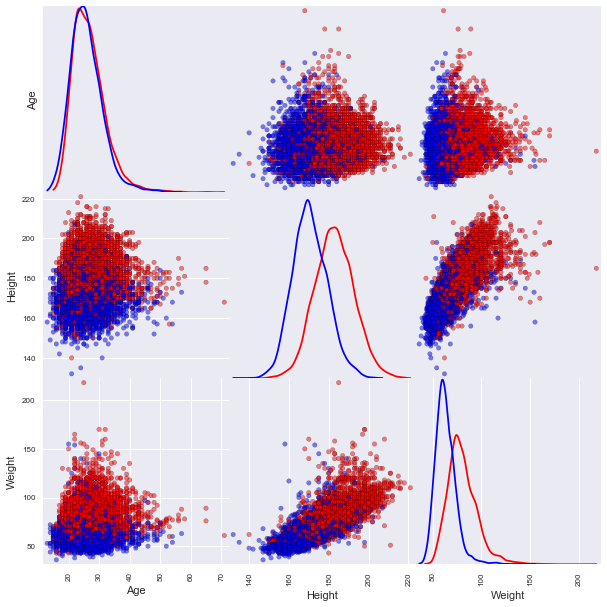

In [54]:
# Scatter plots show that height and weight are positively correlated for both Male and Female athletes.

axarr, color_map = factor_scatter_matrix(olympians_data[['Age','Height','Weight','Sex']].dropna(),'Sex')
print 'Legend',color_map
plt.show()

##### Create a new variable for the weight in lbs.  Check out the correlations again.  Do you notice any changes?

In [55]:
# Convert weight to lbs
olympians_data['weight_lb'] = olympians_data['Weight']*2.20462

Legend {'M': 'red', 'F': 'blue'}


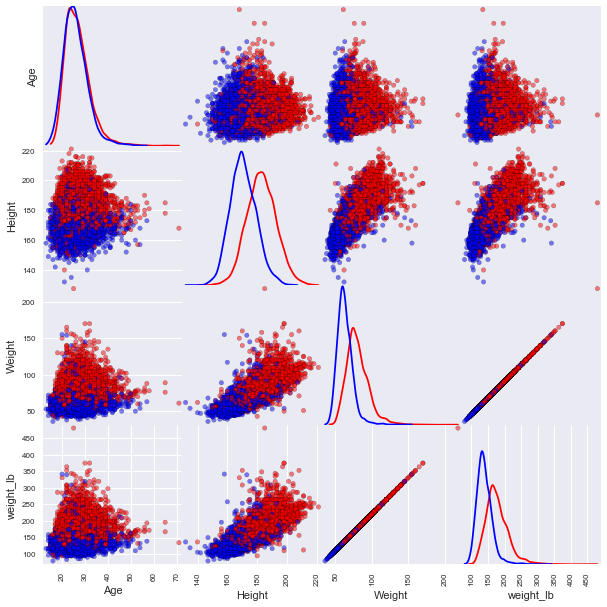

In [56]:
# Converting the weight into lbs doesn't make any difference to the relationship amongst the variables 
# This is because, converting to lb only changes the scale.
axarr, color_map = factor_scatter_matrix(olympians_data[['Age','Height','Weight','weight_lb','Sex']].dropna(),'Sex')
print 'Legend',color_map
plt.show()

##### Remove one of the weight variables.   Add new variable weight + height.  Visualize scatter plot.  Is this a useful variable? 

In [57]:
# Create a new variable Weight (lbs) + Height

olympians_data2 = olympians_data
olympians_data2['w_h'] = olympians_data2['Weight'] + olympians_data2['Height']

Legend {'M': 'red', 'F': 'blue'}


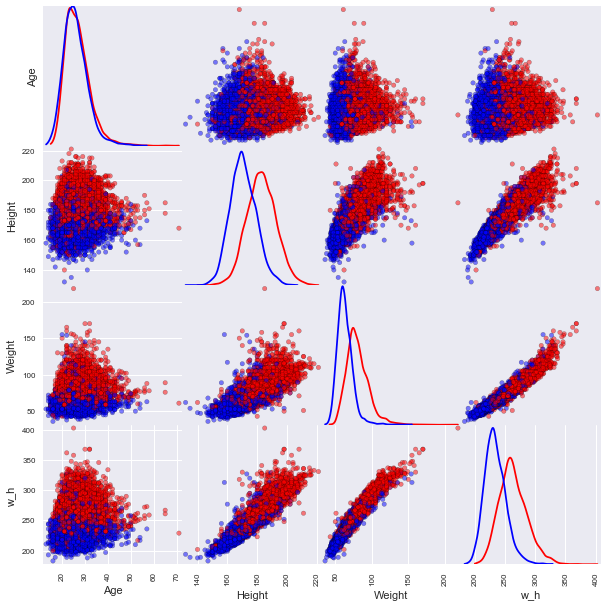

In [58]:
# Weight and weight+height variables seem to be highly correlated.
# However since the scale of height and weight are different, just adding the two do not mean much.

axarr, color_map = factor_scatter_matrix(olympians_data2[['Age','Height','Weight','w_h','Sex']].dropna(),'Sex')
print 'Legend',color_map
plt.show()

##### Repeat the same exercise for Body Mass Index defined as Mass (kg)/Height(m) 2 (Note: Weight already in Kg. and Height is in cm).  Is this a useful variable?

In [59]:
# Calculate BMI

olympians_data2['Height_m'] = olympians_data2['Height']*0.01
olympians_data2['BMI'] = olympians_data2['Weight']/(olympians_data2['Height_m'])**2

Legend {'M': 'red', 'F': 'blue'}


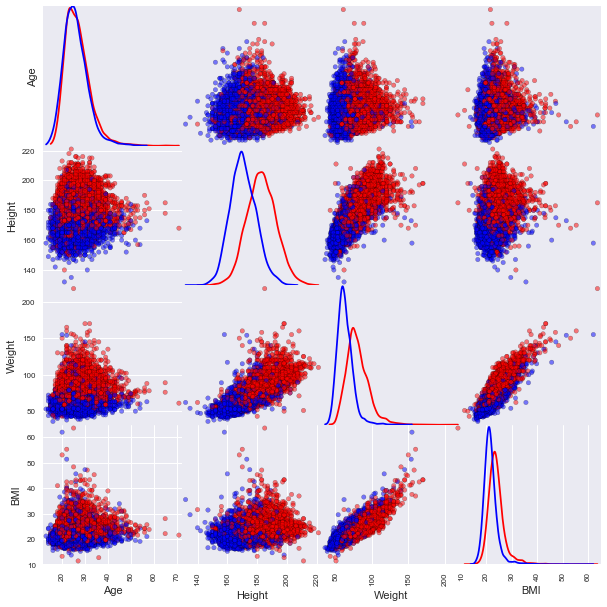

In [60]:
# BMI spread for Male and Female athletes are comparable and also weight and BMI are nicely correlated. 
# So BMI is a useful variable.

axarr, color_map = factor_scatter_matrix(olympians_data2[['Age','Height','Weight','BMI','Sex']].dropna(),'Sex')
print 'Legend',color_map
plt.show()

##### Plot the BMI of the athletes.  Are there any obese athletes?   Male of Female? 

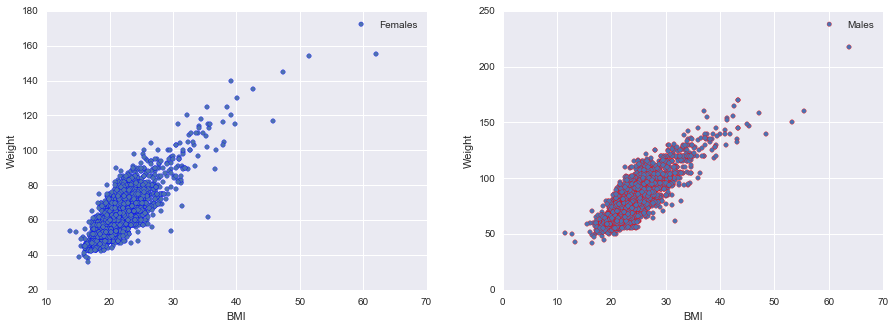

In [61]:
## Plotting BMI to understand if there are overweight athletes
## There are fewer obese Female athletes than Males (Considering the defition obese : BMI>30)

females = olympians_data2[olympians_data2['Sex']=='F']
males = olympians_data2[olympians_data2['Sex']=='M']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax = females.plot(kind='scatter', x='BMI', y='Weight',color='blue', label='Females', ax=axes[0]);
males.plot(kind='scatter', x='BMI', y='Weight',color='red', label='Males',ax=axes[1]);

##### Visualize scatterplot of Total Class with Height, Weight, Sex and BMI.  Split data by sport.  What can you conclude based on the split?


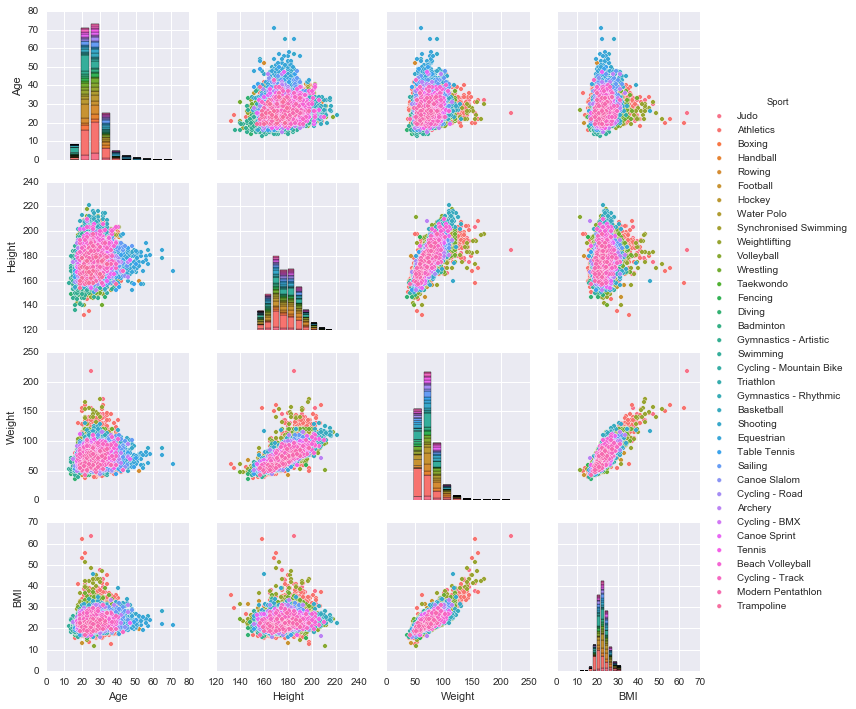

In [62]:
# Plotting all the sports in scatter matrix isn't very useful as it is not very easy to read.
import seaborn as sns
sns.set()
sns.pairplot(olympians_data2[['Age','Height','Weight','BMI','Sex','Sport']], hue="Sport")

/Users/Deepthi/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


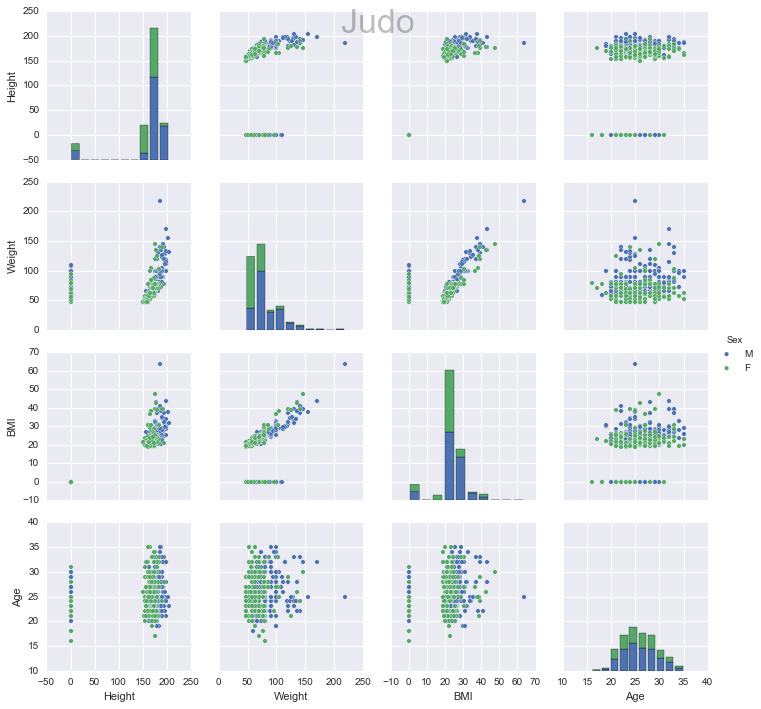

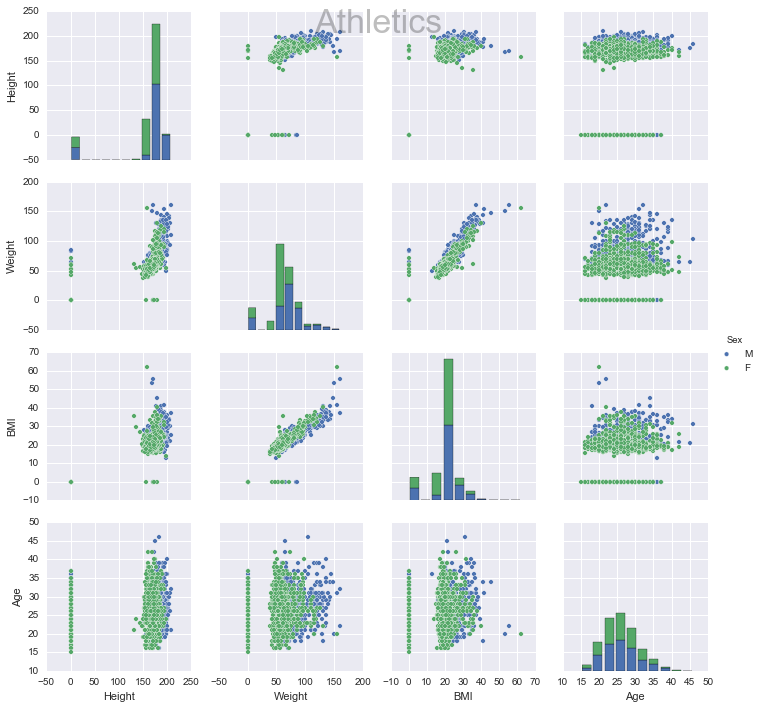

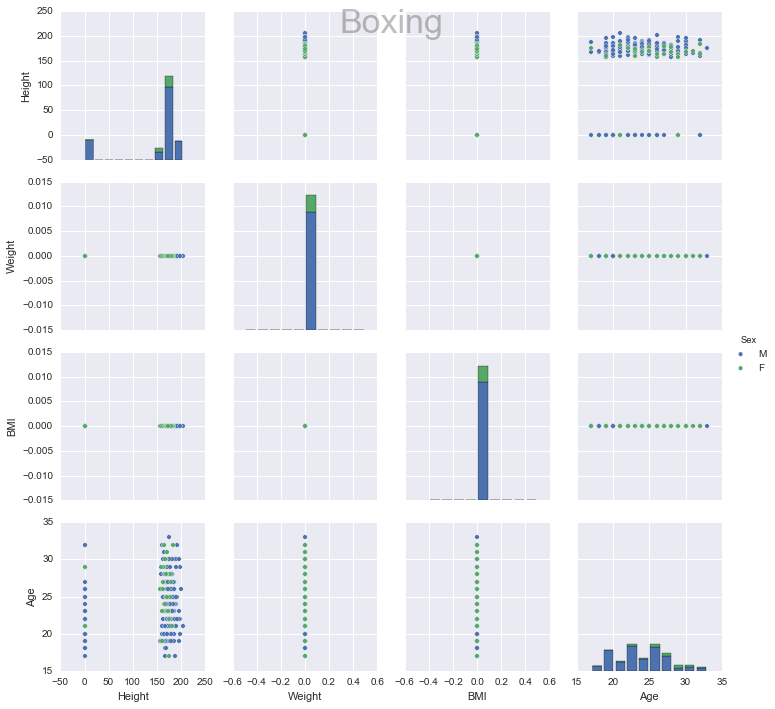

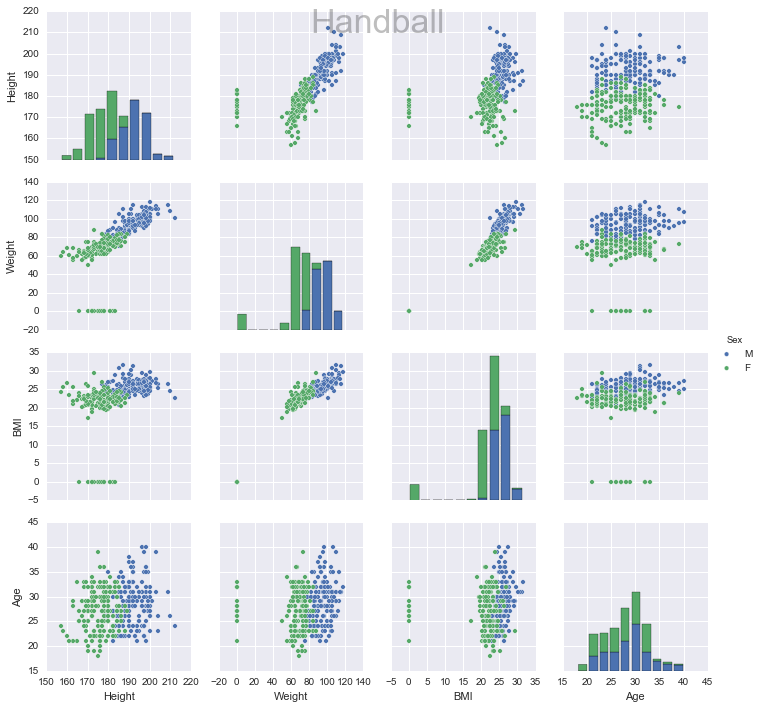

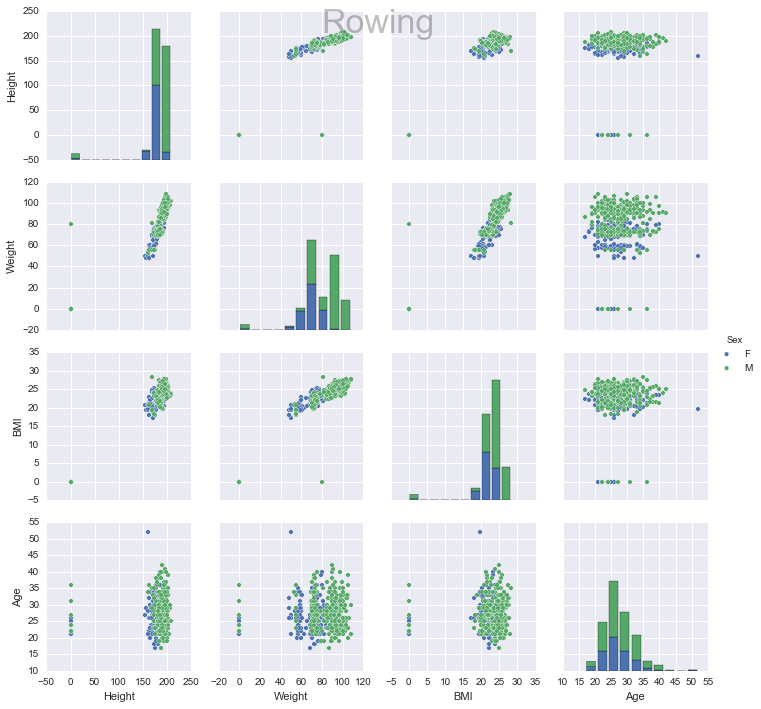

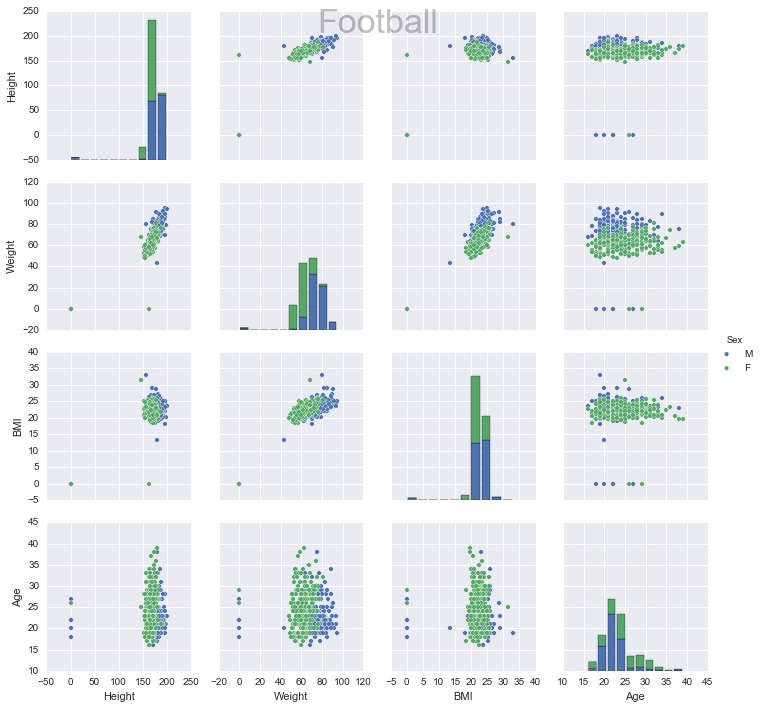

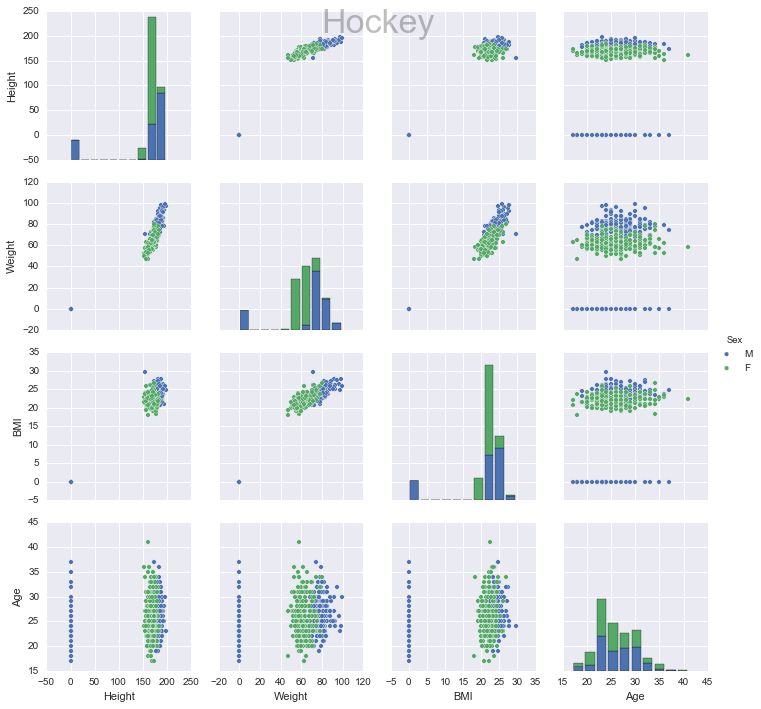

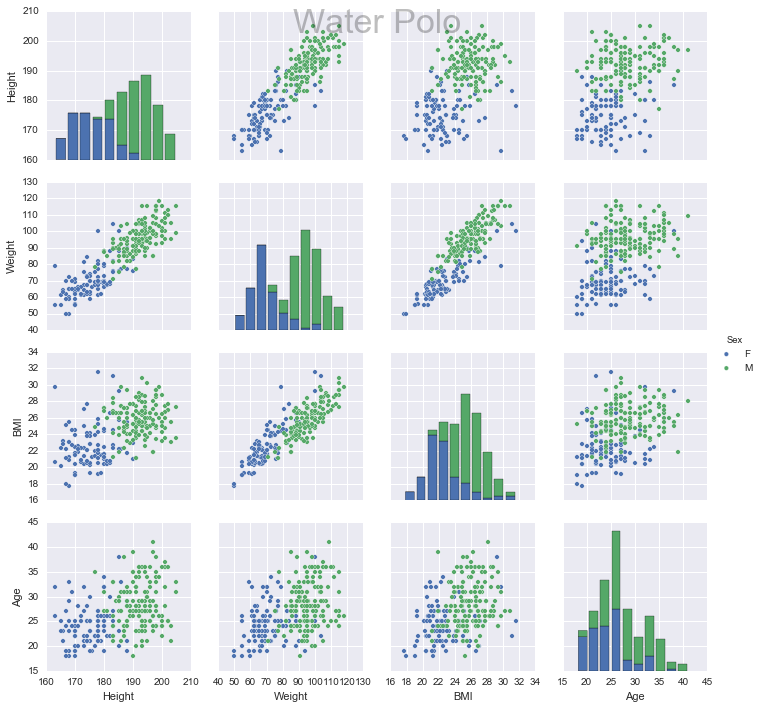

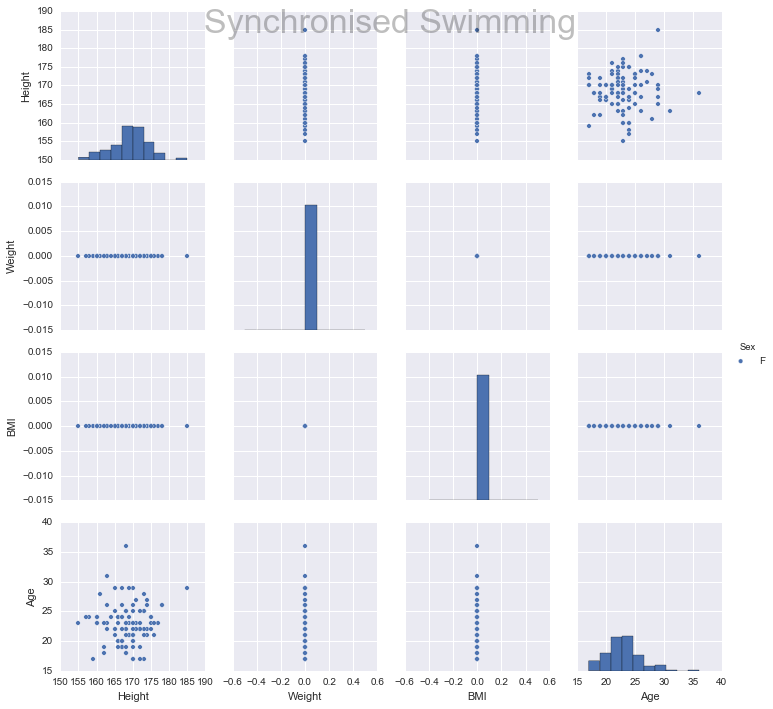

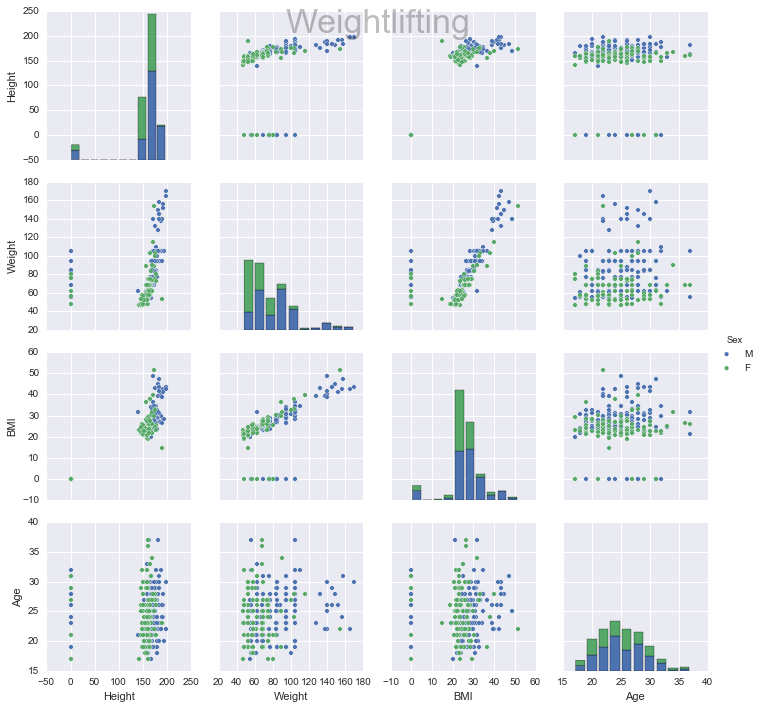

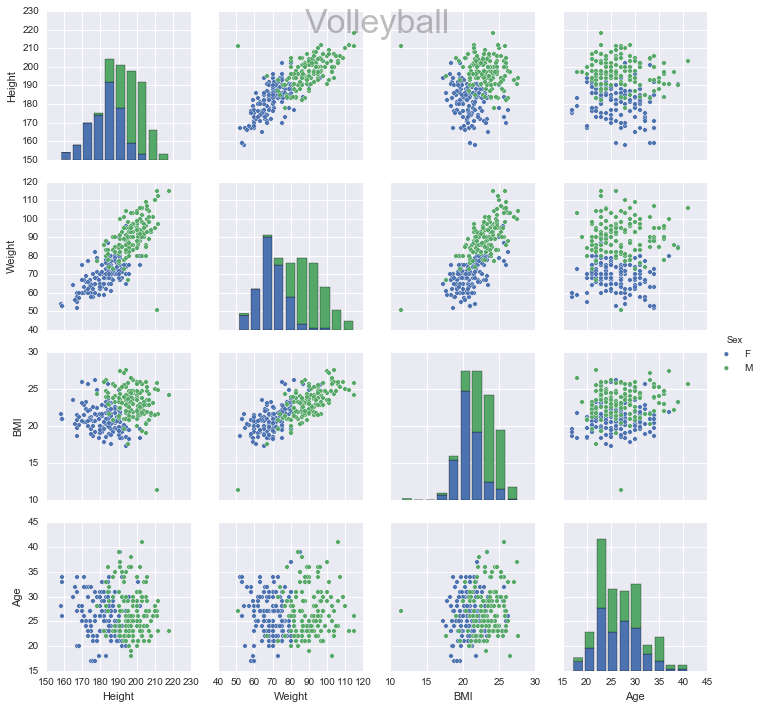

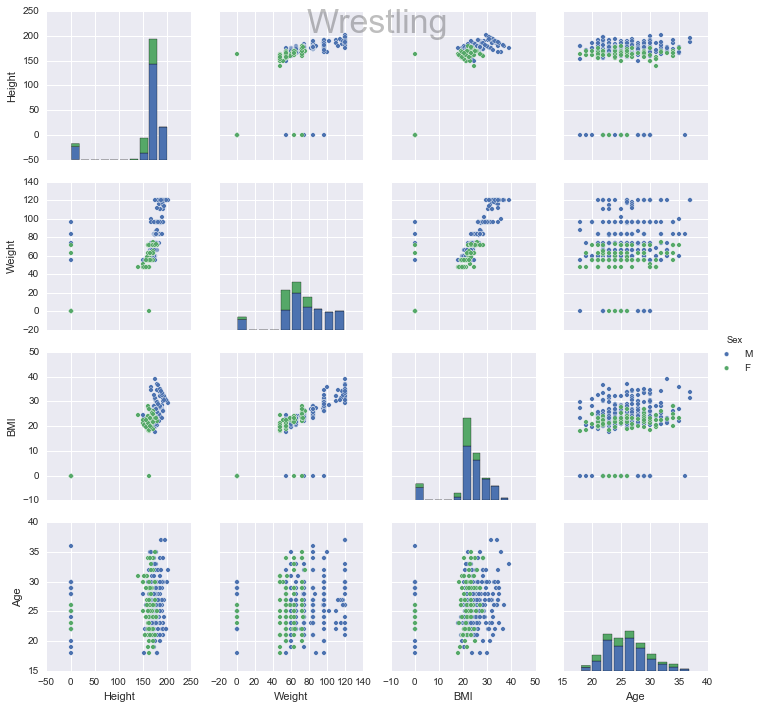

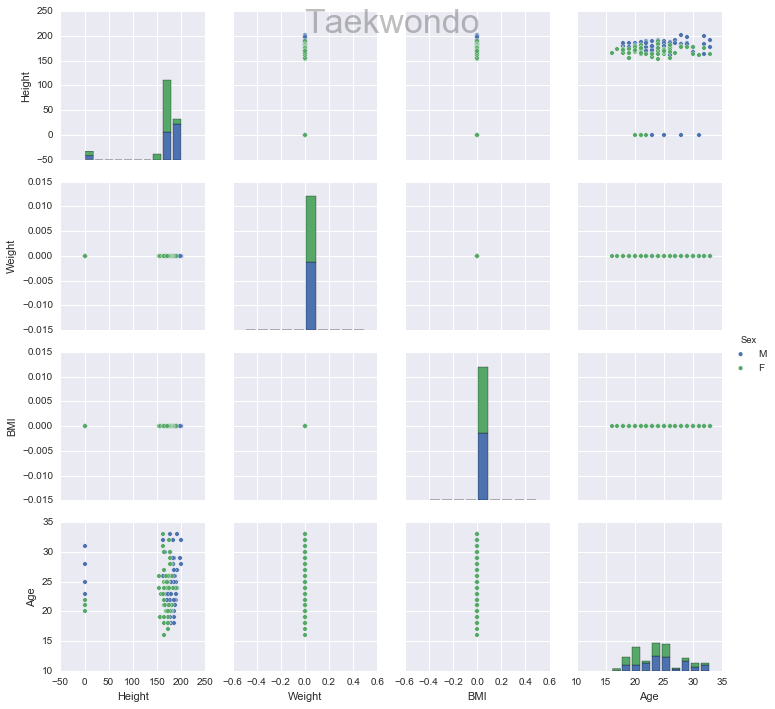

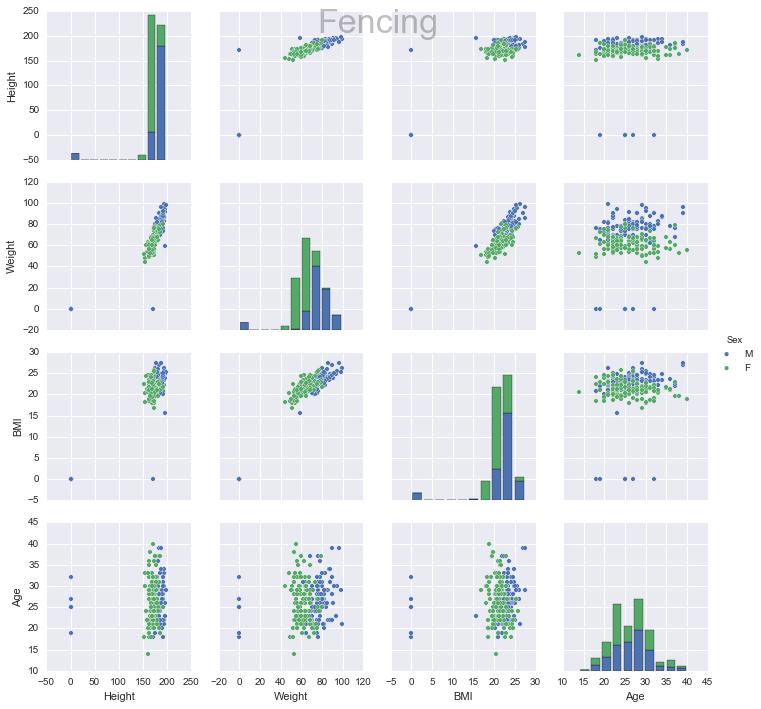

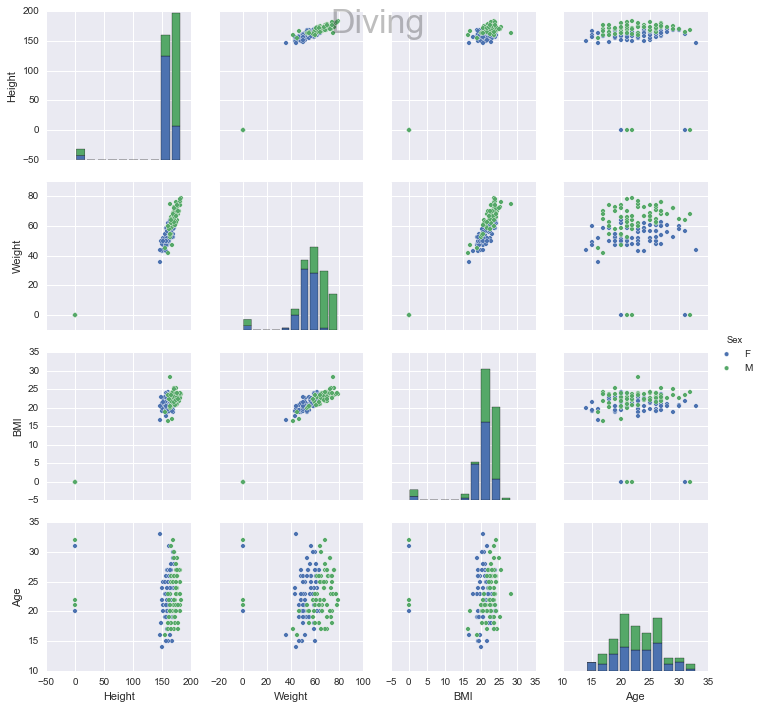

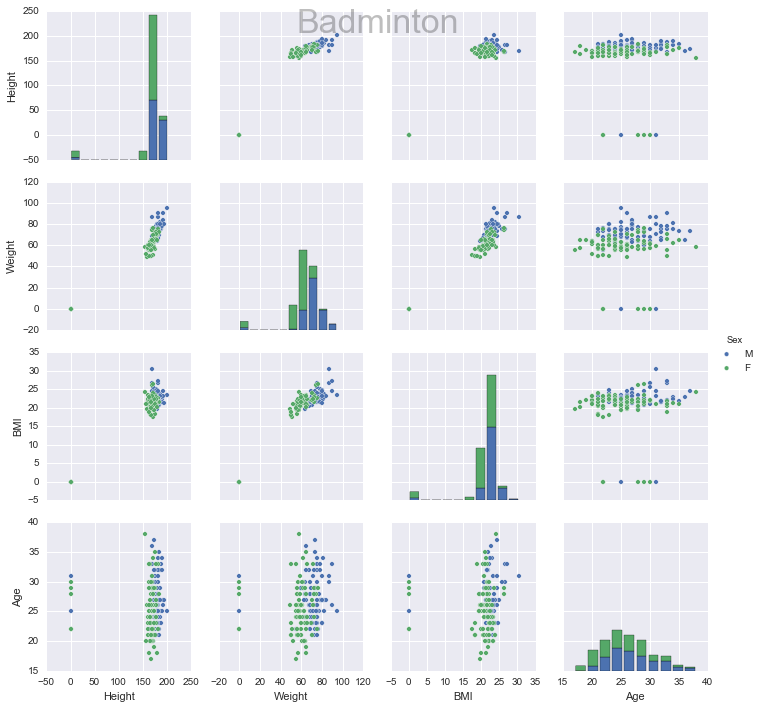

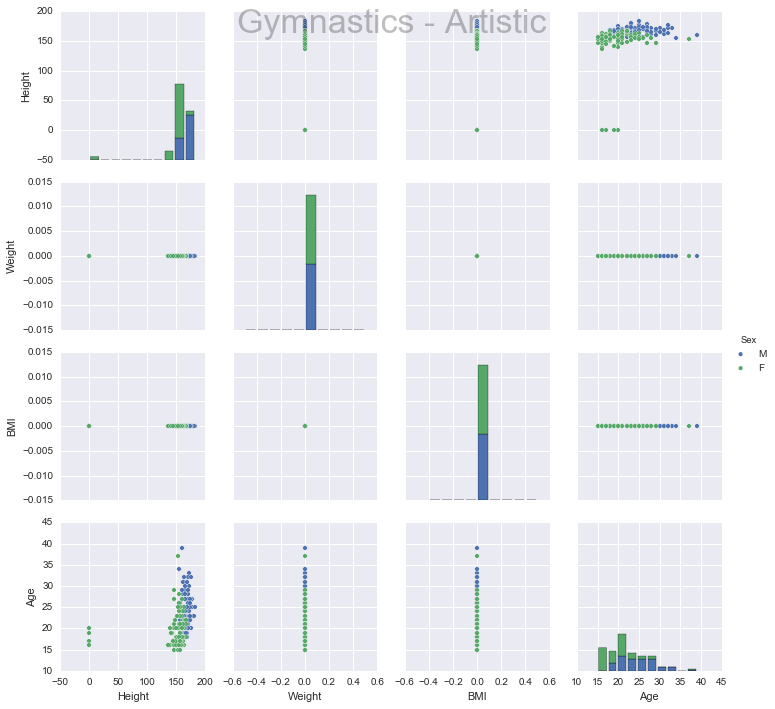

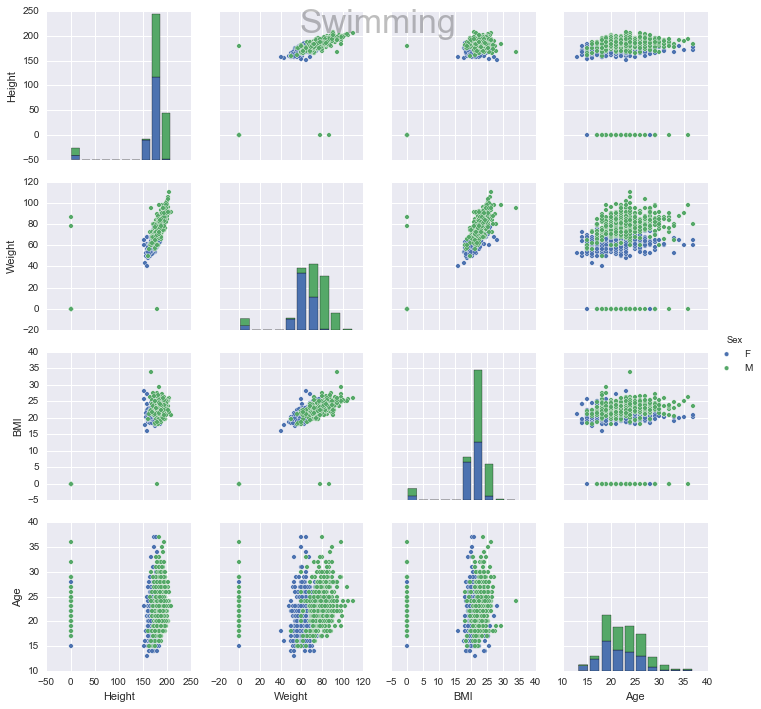

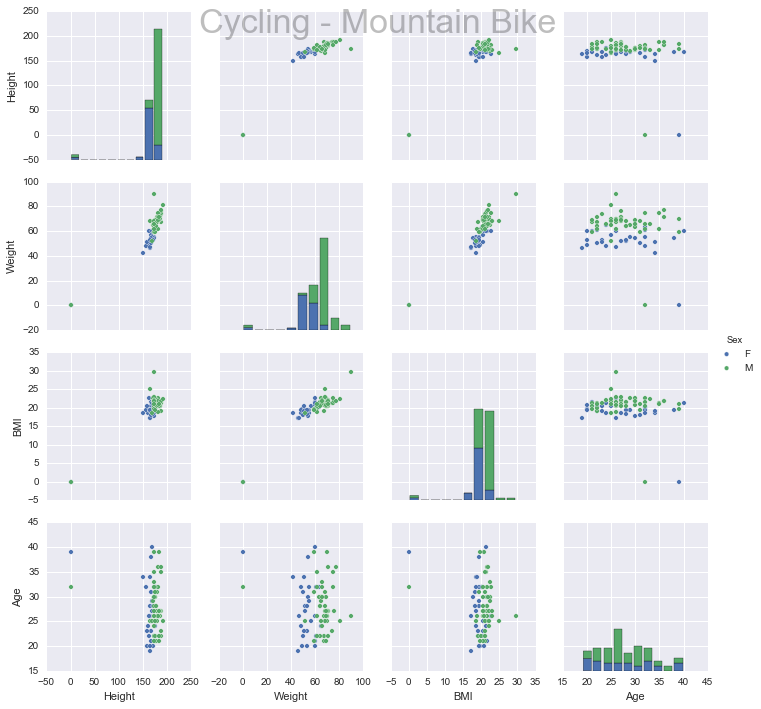

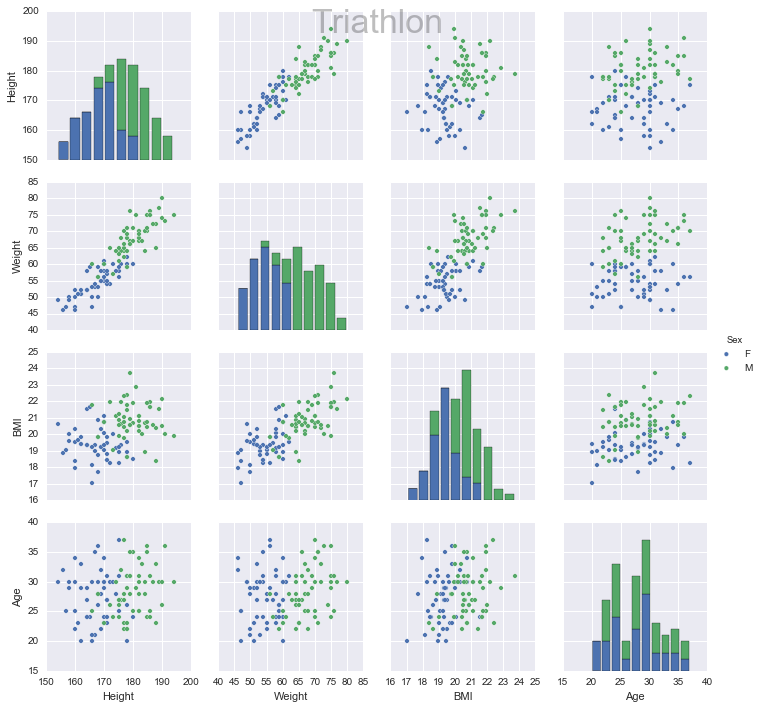

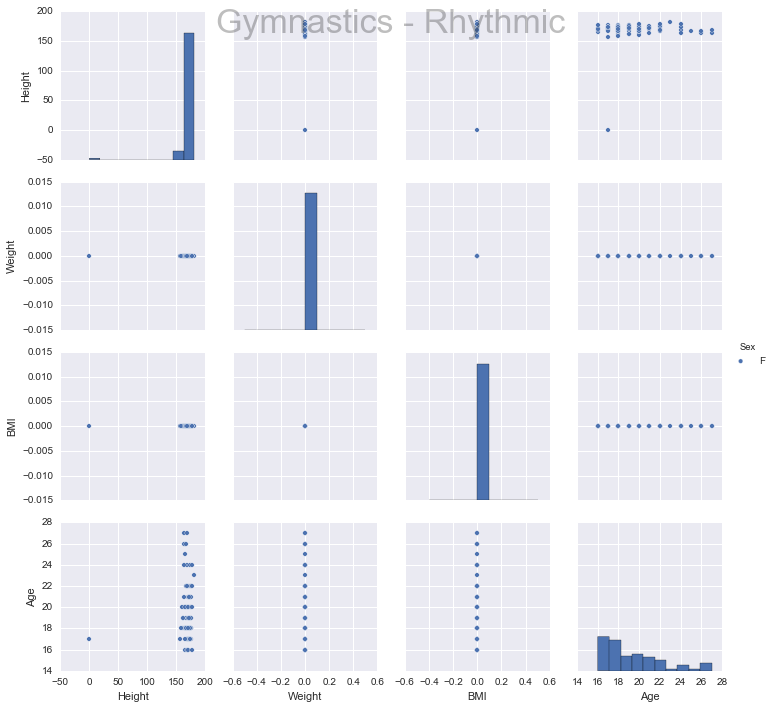

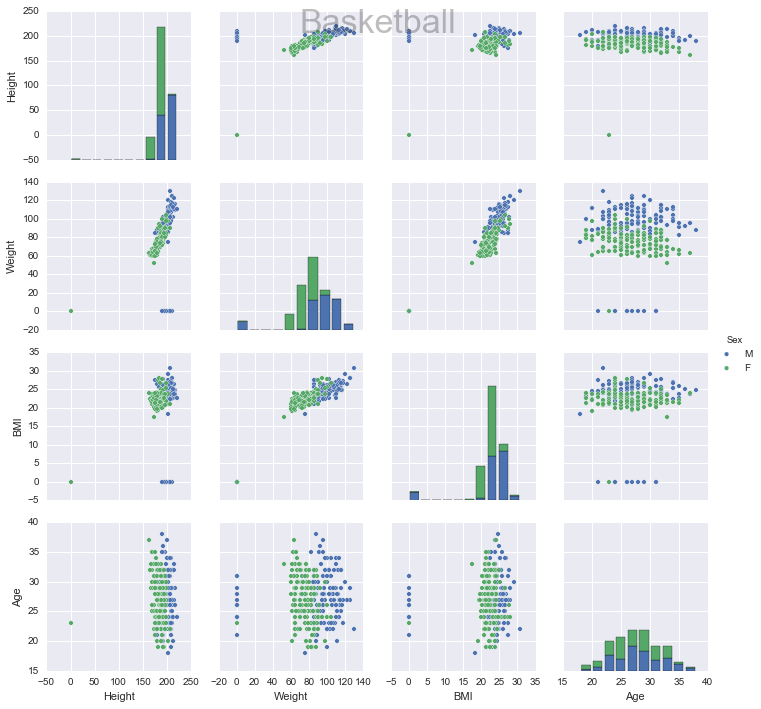

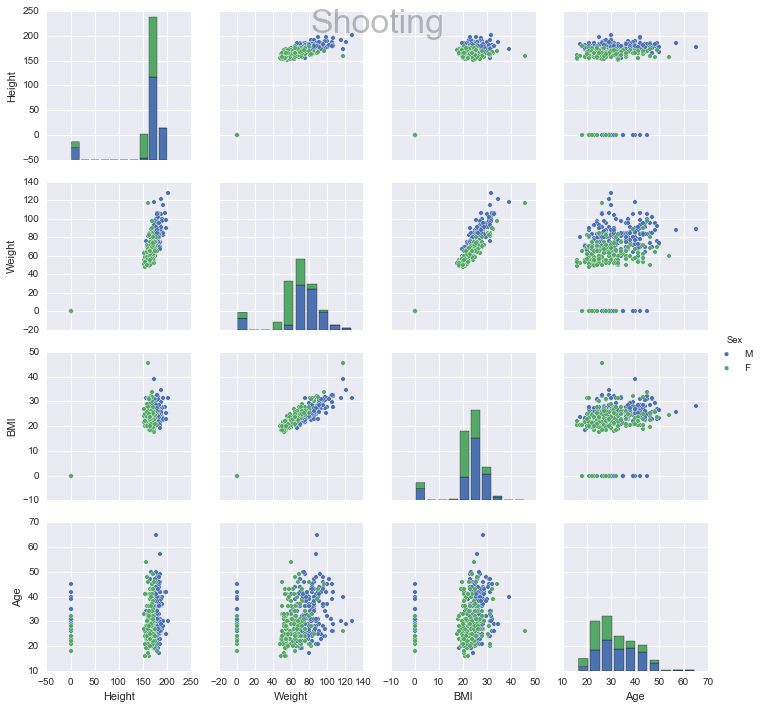

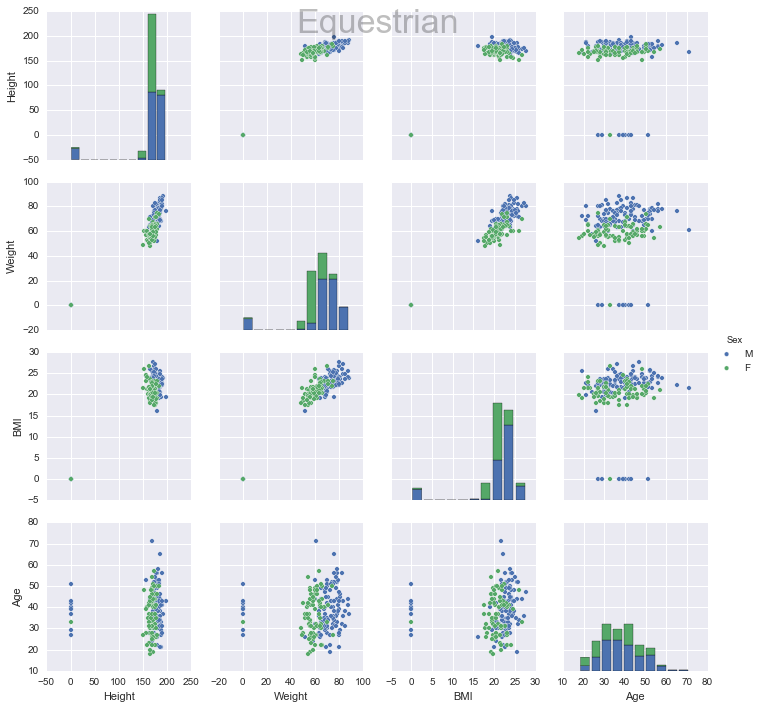

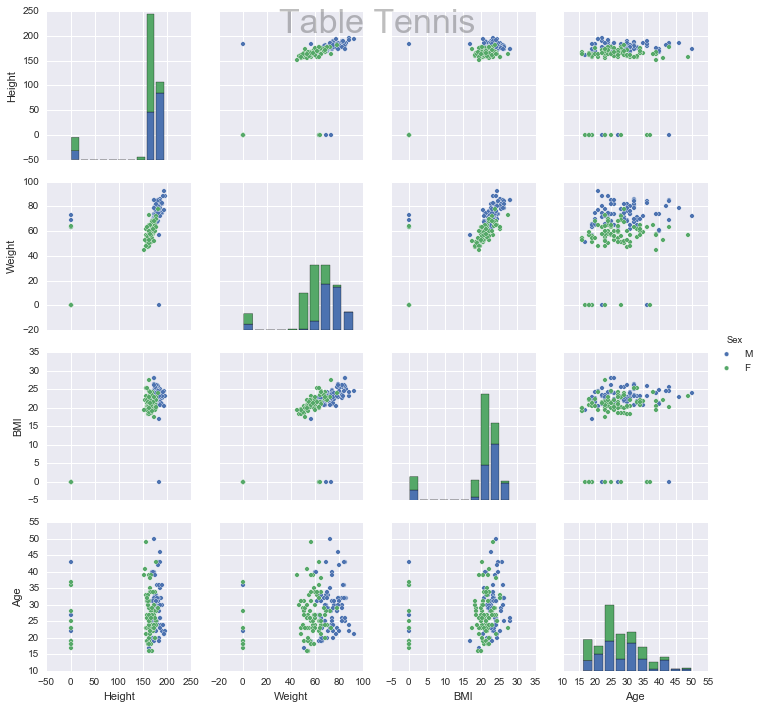

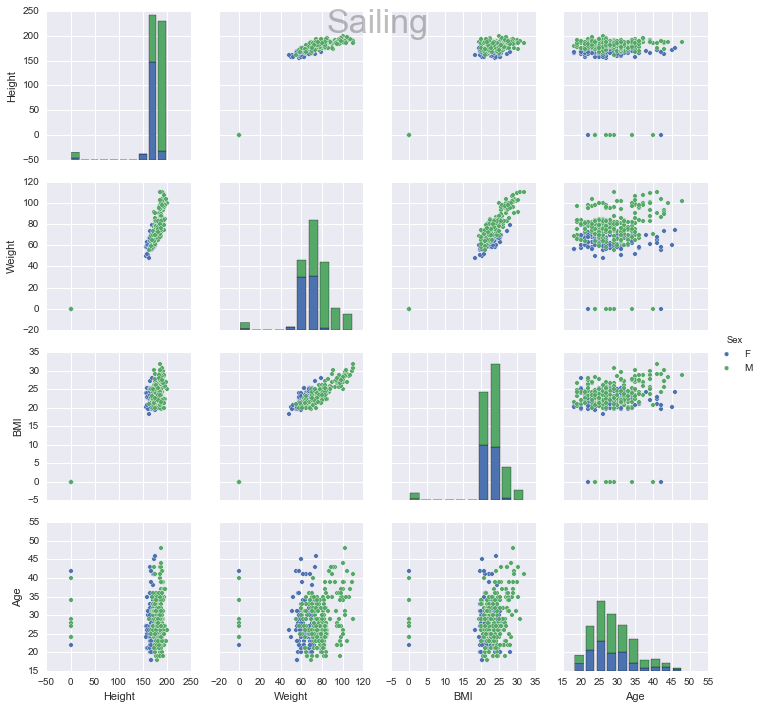

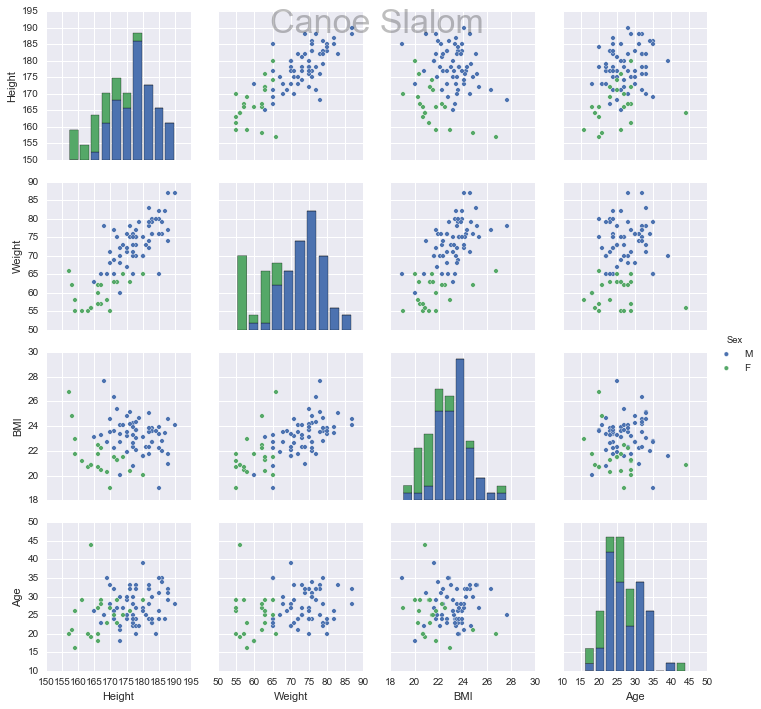

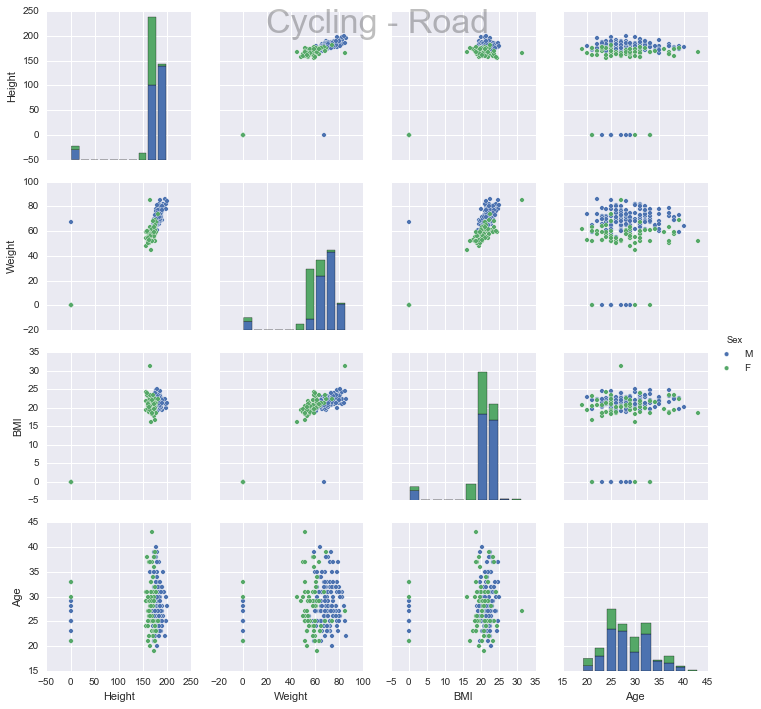

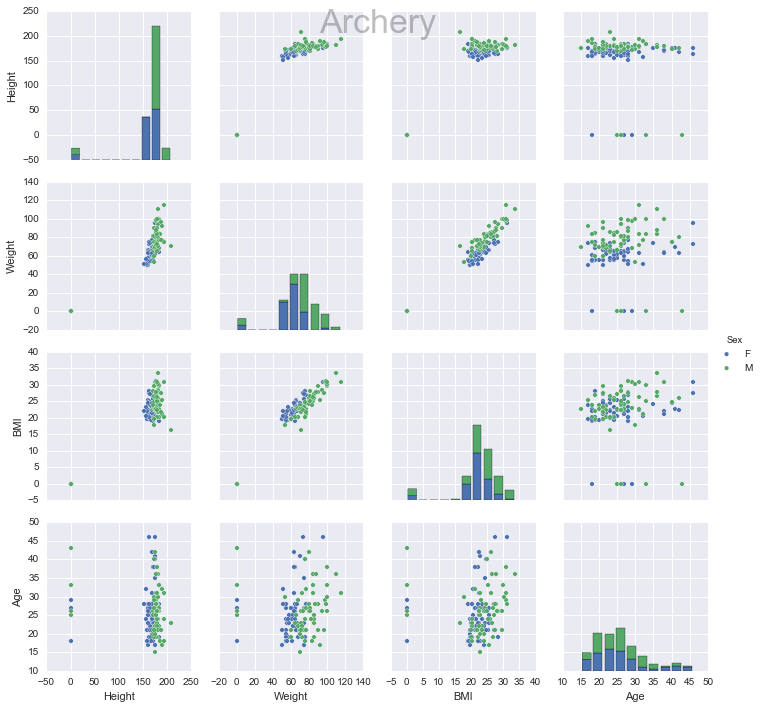

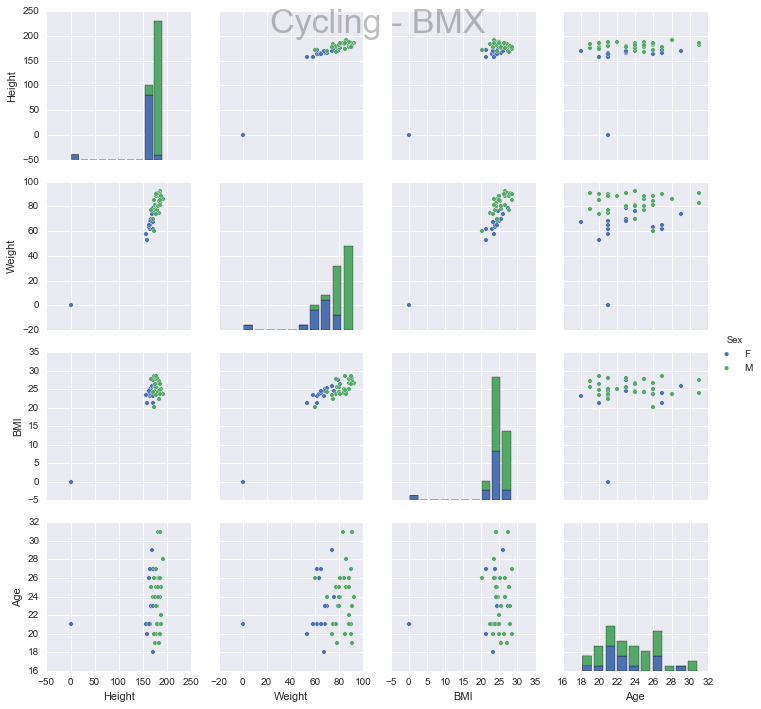

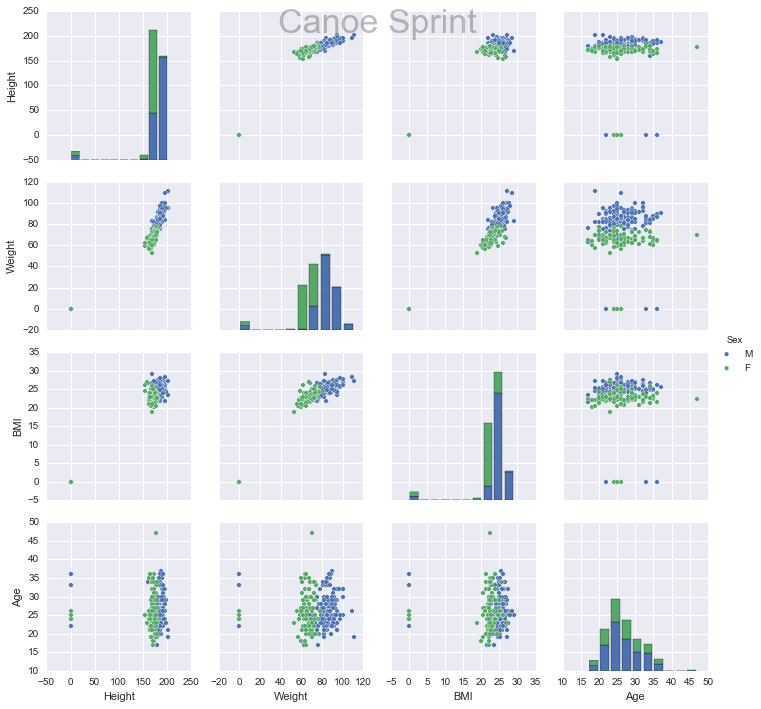

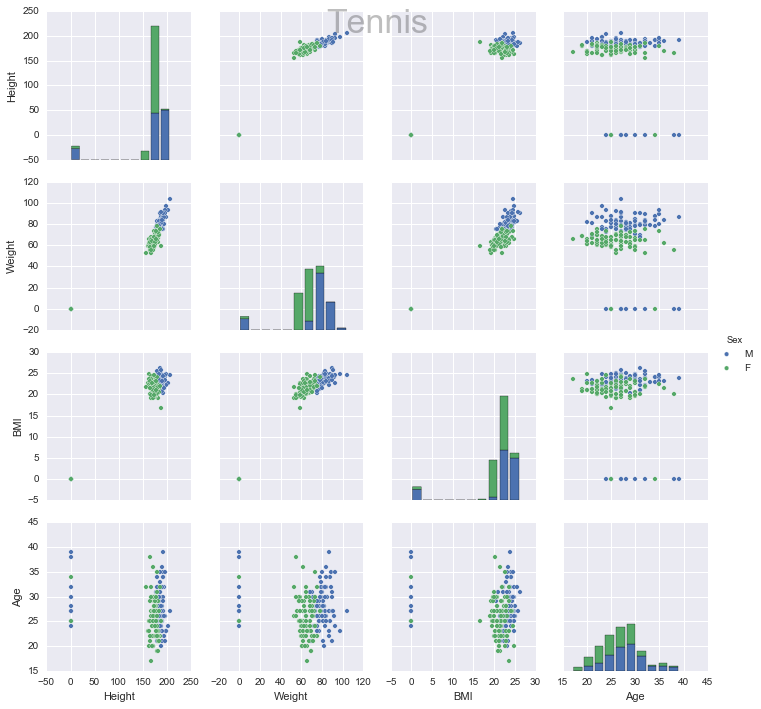

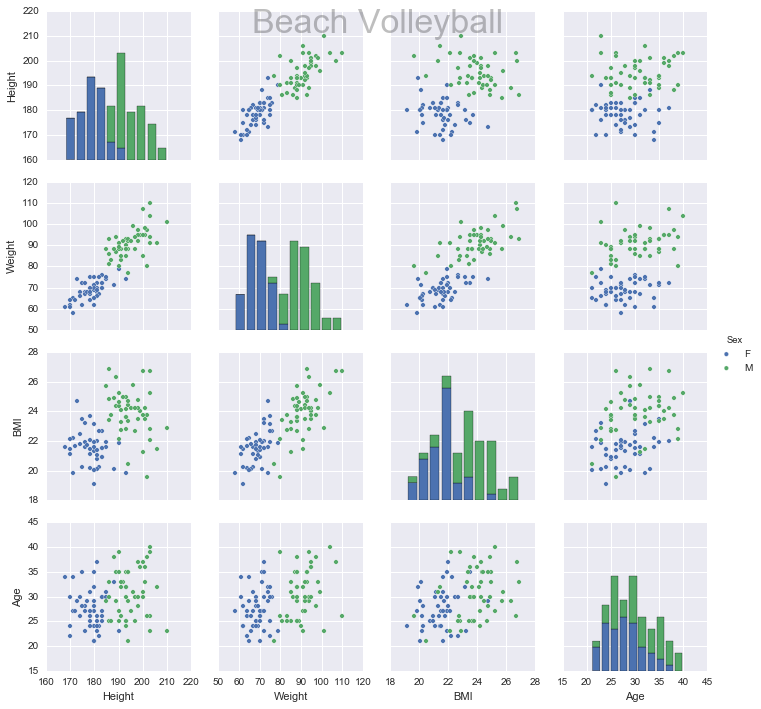

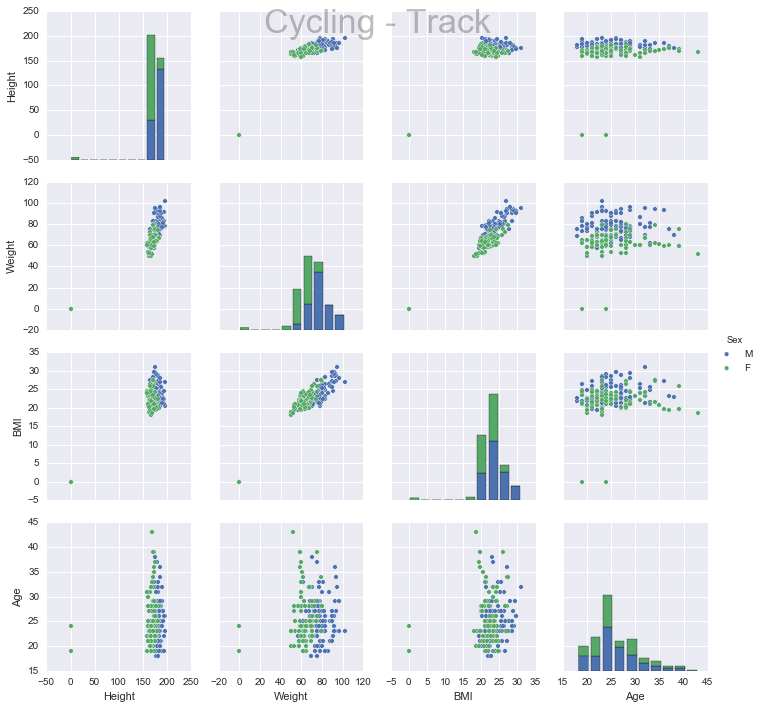

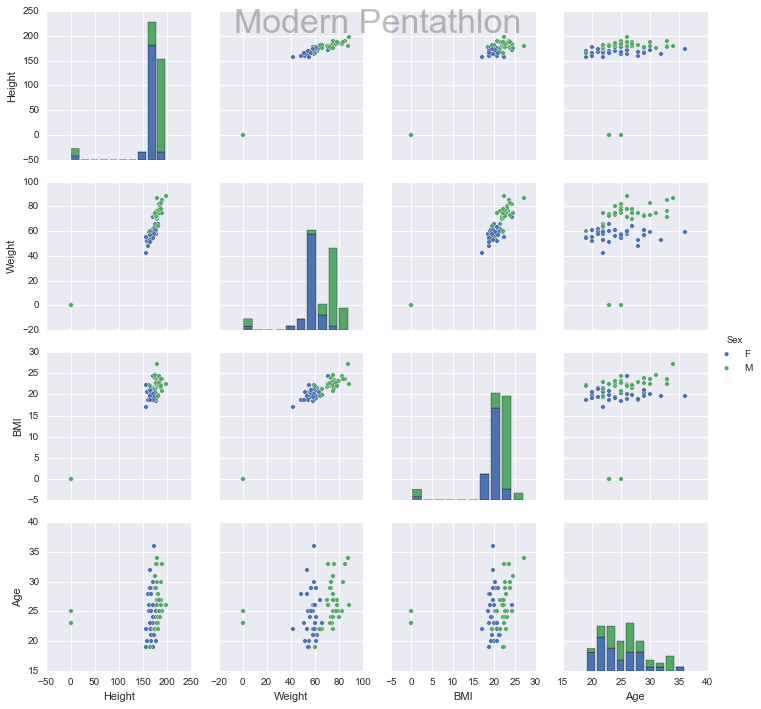

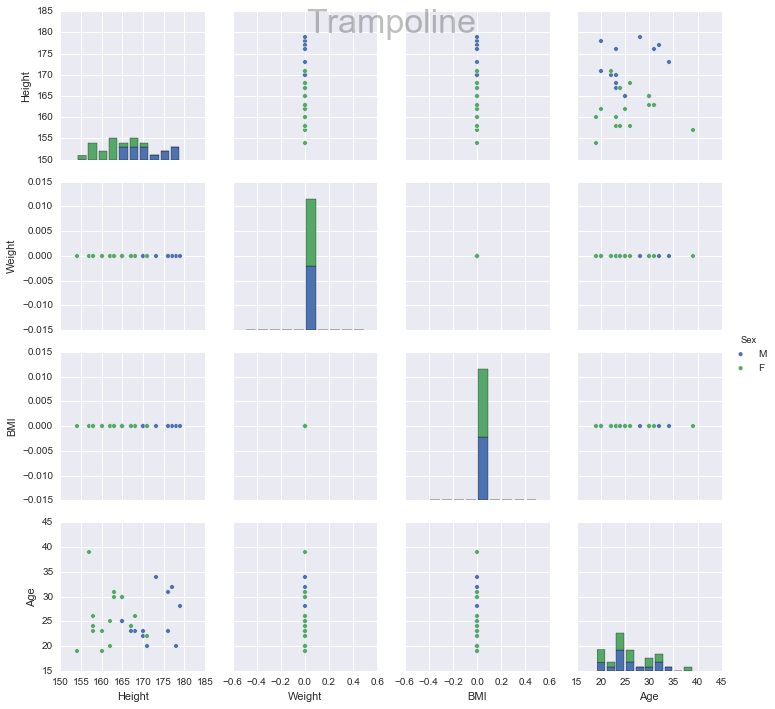

In [63]:
# The following scatter matrices are very useful. Since each sport needs different qualities, the distribution and
# relationships of variables are very different. Also, there is a clear demarcation of males and females in most sports.


sports = olympians_data2['Sport'].unique()
for i in range(len(sports)):
    to_plot = olympians_data2[olympians_data2['Sport']==sports[i]][['Height','Weight','BMI','Age','Sex','Sport']].fillna(0)
    g=sns.pairplot(to_plot, hue="Sex")
    g.fig.suptitle(sports[i], fontsize=34,alpha=0.3)